## Table of contents  
<a id='toc'></a>
1. [Importing packages](#1)  
    
2. [Calculate and output the following](#2)  
   a). What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?<br>
   b). What is the average NoPLHIV of the two estimates used for “Xhariep”?<br>
   c). Add a column and populate it with the number of people not living with HIV for each row. <br>
   e). What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 
    

3. [Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output.](#3) 
4. [Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph.](#4) 



I took 2 hours doing the calculations and at least and 2 hours trying to plot.

## 1. Importing packages 
<a id='1'></a>
[Back to table of contents](#toc)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data=pd.read_excel('pone.0212445.s004.xlsx',header=1)
#fisrt 10 rows
data.head(10)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639
6,Cacadu,DC10,Survey,7.600000,3.484000,11.716000,34732,15922,53542
7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298
8,Amatole,DC12,Survey,11.000000,7.276000,14.724000,98884,65407,132361
9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230


## 2. Calculate and output yhe following
<a id='2'></a>
[Back to table of contents](#toc)

In [59]:
data.District.unique()

array(['Buffalo City', 'City of Cape Town', 'West Coast', 'Cacadu',
       'Amatole', 'Chris Hani', 'Joe Gqabi', 'O.R. Tambo', 'Xhariep',
       'Lejweleputswa', 'Thabo Mofutsanyana', 'Cape Winelands',
       'Fezile Dabi', 'Ugu', 'uMgungundlovu', 'uThukela', 'uMzinyathi',
       'Amajuba', 'Zululand', 'uMkhanyakude', 'uThungulu', 'iLembe',
       'Overberg', 'Gert Sibande', 'Nkangala', 'Ehlanzeni', 'Mopani',
       'Vhembe', 'Capricorn', 'Waterberg', 'Bojanala Platinum',
       'Ngaka Modiri Molema', 'Dr Ruth Segomotsi Mompati', 'Eden',
       'Dr Kenneth Kaunda', 'Sedibeng', 'Sisonke', 'Alfred Nzo',
       'John Taolo Gaetsewe', 'Sekhukhune', 'West Rand', 'Central Karoo',
       'Namakwa', 'Pixley ka Seme', 'Siyanda', 'Frances Baard',
       'Ekurhuleni', 'eThekwini', 'City of Johannesburg', 'Mangaung',
       'Nelson Mandela Bay Metro', 'City of Tshwane'], dtype=object)

In [60]:
data. Estimate.unique()

array(['Survey', 'Fay-Heriott'], dtype=object)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


In [62]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


2.a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [63]:
Total_number=data[data['Estimate']=='Survey']. NoPLHIV.sum()
print(Total_number)

6409903


2.b) What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [64]:
Average_=data[data['District']=='Xhariep'].NoPLHIV.mean()
round(Average_)

12248

2.c) Add a column and populate it with the number of people not living with HIV for each row. 

In [65]:
data['NoP_not_LHIV']=(100-data['Prevalence_%'])*data.NoPLHIV
data['NoP_not_LHIV']=data['NoP_not_LHIV'].round()

In [66]:
#number of people not living with HIV column;"NoP_not_LHIV"
data['NoP_not_LHIV']=data['NoP_not_LHIV'].astype(int)

In [67]:
#check if the data frame information changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
 9   NoP_not_LHIV    104 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 7.8+ KB


In [68]:
#showing the added column 
data.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoP_not_LHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,8850557
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,8796314
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,19031195
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,21841788
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,1099685


What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 

In [69]:
keywords=["city",'metro']
data[data.District.str.contains('|'.join(keywords),case=False)].head(20)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoP_not_LHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,8850557
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,8796314
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,19031195
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,21841788
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,45817904
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,45728724
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,8936990
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,9668736
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,31916035
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,30304310


In [70]:
#getting the number of people living with HIV for the above distict
data[data.District.str.contains('|'.join(keywords),case=False)].NoPLHIV.sum()

2572733

## 3. Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output.
<a id='3'></a>
[Back to table of contents](#toc)

In [71]:
new_data=data
new_data.columns=data.columns.str.replace('[^a-zA-Z0-9]','',regex=True)
new_data.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPnotLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,8850557
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,8796314
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,19031195
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,21841788
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,1099685


In [72]:
#column names without special characters
print(new_data.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'NoPnotLHIV'],
      dtype='object')


## 4. Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 
<a id='4'></a>
[Back to table of contents](#toc)

In [73]:
#slicing the data frame to only contains disticts that ends with "i"
df_slice=data[data.District.str.endswith('i')]


In [74]:
df_slice.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPnotLHIV
10,Chris Hani,DC13,Survey,14.300000,10.184000,18.416000,114849,81792,147906,9842559
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,9716582
12,Joe Gqabi,DC14,Survey,10.700000,7.956000,13.444000,37766,28081,47451,3372504
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,3594376
24,Fezile Dabi,DC20,Survey,9.000000,6.256000,11.744000,45550,31662,59438,4145050


In [75]:
#slicing the above data frame fursther to get the "Fay-Heriott" Estimate
df_slice2=df_slice[df_slice['Estimate']=='Fay-Heriott']
df_slice2

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPnotLHIV
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,9716582
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,3594376
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,4567469
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,7621921
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,22827588
53,Mopani,DC33,Fay-Heriott,11.294971,7.921185,15.858238,87157,61123,122369,7731264
65,Dr Ruth Segomotsi Mompati,DC39,Fay-Heriott,11.045235,8.164344,14.779090,52136,38538,69761,4637746
93,Ekurhuleni,EKU,Fay-Heriott,13.678908,10.647292,17.405572,441990,344033,562405,38153060
95,eThekwini,ETH,Fay-Heriott,14.537772,11.791222,17.795017,503618,408472,616456,43040316


In [76]:
df1=df_slice2[['District','PrevalenceLCL']]

df1.rename(columns={'PrevalenceLCL':'value'},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21364\4049719984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'PrevalenceLCL':'value'},inplace=True)


In [77]:
df1

,District,value
11,Chris Hani,11.181220
13,Joe Gqabi,9.291766
25,Fezile Dabi,7.811309
33,uMzinyathi,16.845087
51,Ehlanzeni,12.012425
53,Mopani,7.921185
65,Dr Ruth Segomotsi Mompati,8.164344
93,Ekurhuleni,10.647292
95,eThekwini,11.791222


In [78]:
df2=df_slice2[['District','PrevalenceUCL']]
df2.rename(columns={'PrevalenceUCL':'value'},inplace=True)
df2

C:\Users\User\AppData\Local\Temp\ipykernel_21364\3025235325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'PrevalenceUCL':'value'},inplace=True)


,District,value
11,Chris Hani,17.583893
13,Joe Gqabi,14.169794
25,Fezile Dabi,12.793304
33,uMzinyathi,19.421445
51,Ehlanzeni,20.554906
53,Mopani,15.858238
65,Dr Ruth Segomotsi Mompati,14.779090
93,Ekurhuleni,17.405572
95,eThekwini,17.795017


In [79]:
combined_df=pd.concat([df1,df2],axis=0)
combined_df

,District,value
11,Chris Hani,11.181220
13,Joe Gqabi,9.291766
25,Fezile Dabi,7.811309
33,uMzinyathi,16.845087
51,Ehlanzeni,12.012425
53,Mopani,7.921185
65,Dr Ruth Segomotsi Mompati,8.164344
93,Ekurhuleni,10.647292
95,eThekwini,11.791222
11,Chris Hani,17.583893


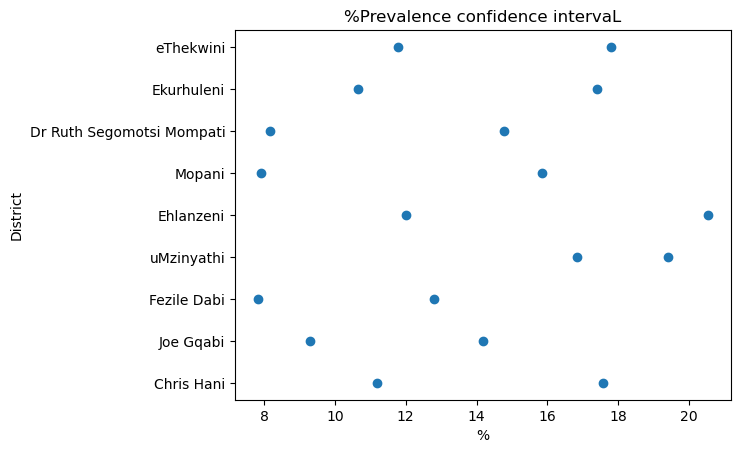

<Figure size 1000x600 with 0 Axes>

In [80]:
fig, axs = plt.subplots()
axs.scatter(combined_df.value,combined_df.District)
plt.xlabel("%")
plt.ylabel("District")
plt.title("%Prevalence confidence intervaL")
plt.figure(figsize=(10,6))
plt.show()